<a href="https://colab.research.google.com/github/JavierDoom/Programa-de-Fidelizaci-n-de-Clientes./blob/main/Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PASO 4: Análisis exploratorio de datos (Python)
#---- Importar libreerias------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# ---- Cargar los archivos CSV -----

# Datos de viajes por compañía de taxis
cabs_df = pd.read_csv('/datasets/project_sql_result_01.csv')

# Datos de promedio de viajes por barrio
neighborhoods_df = pd.read_csv('/datasets/project_sql_result_04.csv')

# Mostrar las primeras filas de cada dataset
print("### Dataset: Cabs")
display(cabs_df.head())

print("### Dataset: Neighborhoods")
display(neighborhoods_df.head())


### Dataset: Cabs


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


### Dataset: Neighborhoods


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:


#----- Revisar tipos de datos y limpiar si es necesario -----

print(cabs_df.info())
print(neighborhoods_df.info())

# Convertir columnas a tipo numérico en caso de que estén mal
cabs_df['trips_amount'] = pd.to_numeric(cabs_df['trips_amount'], errors='coerce')
neighborhoods_df['average_trips'] = pd.to_numeric(neighborhoods_df['average_trips'], errors='coerce')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [ ]:


# ----Seleccionar los 10 barrios con más viajes finalizados----

top_10_neighborhoods = neighborhoods_df.sort_values(
    by='average_trips', ascending=False
).head(10).reset_index(drop=True)

# Agregamos columna de ranking del 1 al 10
top_10_neighborhoods['rank'] = top_10_neighborhoods.index + 1

# Reordenamos columnas para mostrar rank, barrio y promedio
top_10_neighborhoods = top_10_neighborhoods[['rank', 'dropoff_location_name', 'average_trips']]

# Mostramos la tabla
display(top_10_neighborhoods)



,rank,dropoff_location_name,average_trips
0,1,Loop,10727.466667
1,2,River North,9523.666667
2,3,Streeterville,6664.666667
3,4,West Loop,5163.666667
4,5,O'Hare,2546.900000
5,6,Lake View,2420.966667
6,7,Grant Park,2068.533333
7,8,Museum Campus,1510.000000
8,9,Gold Coast,1364.233333
9,10,Sheffield & DePaul,1259.766667


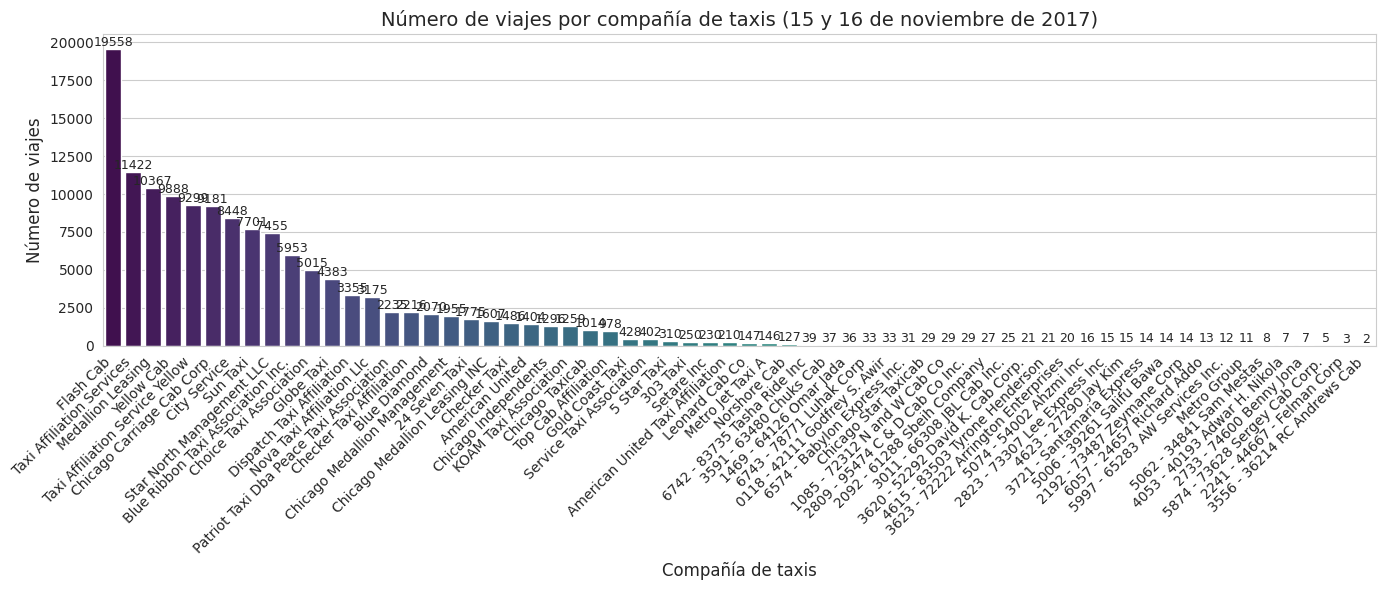

In [ ]:
# ------ Gráfico de viajes por compañía ----------

plt.figure(figsize=(14,6))
ax = sns.barplot(
    data=cabs_df.sort_values(by='trips_amount', ascending=False),
    x='company_name', y='trips_amount', palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.title('Número de viajes por compañía de taxis (15 y 16 de noviembre de 2017)', fontsize=14)
plt.ylabel('Número de viajes', fontsize=12)
plt.xlabel('Compañía de taxis', fontsize=12)

# ---- Agregar etiquetas de valores ----
for i, v in enumerate(cabs_df.sort_values(by='trips_amount', ascending=False)['trips_amount']):
    ax.text(i, v + 200, str(int(v)), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


Las compañías Flash Cab y Taxi Affiliation Services lideran el número de viajes.

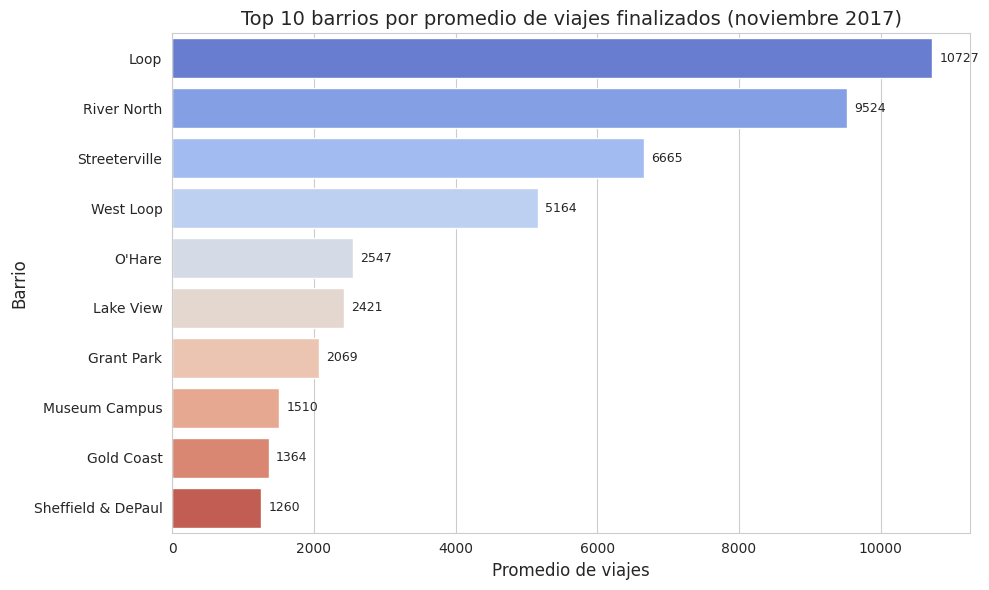

In [ ]:
# ------------ Gráfico horizontal para los 10 barrios principales --------

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top_10_neighborhoods,
    y='dropoff_location_name', x='average_trips', palette='coolwarm'
)
plt.title('Top 10 barrios por promedio de viajes finalizados (noviembre 2017)', fontsize=14)
plt.xlabel('Promedio de viajes', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
# ---- Agregar etiquetas de valores ----
for i, v in enumerate(top_10_neighborhoods['average_trips']):
    ax.text(v + 100, i, f"{v:.0f}", va='center', fontsize=9)
plt.tight_layout()
plt.show()


Loop y River North son los más populares, consistentes con el flujo de pasajeros en aeropuerto y centro de Chicago.

**Paso 4: Análisis Exploratorio de Datos**

- Se cargaron y limpiaron los datasets de viajes de taxis y barrios de Chicago.
- Se aseguraron los tipos de datos correctos para cálculos y gráficos.
- Se identificaron las **empresas de taxis más activas**: Flash Cab y Taxi Affiliation Services.
- Se determinaron los **10 barrios principales por promedio de viajes finalizados**, destacando Loop, River North y Streeterville.
- Los gráficos permitieron visualizar los **patrones de actividad por empresa y por barrio**, destacando zonas de alta demanda.

In [ ]:

# PASO 5. Prueba de hipótesis (Python)

# Importamos librerias
from scipy import stats  # Para pruebas estadísticas Shapiro-Wilk y Mann-Whitney U
import numpy as np

# Cargamos el dataset de viajes Loop → O'Hare
# parse_dates=['start_ts'] convierte la columna start_ts a tipo datetime
trips_loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv', parse_dates=['start_ts'])

# Revisamos las primeras filas para confirmar la carga correcta
trips_loop_ohare.head()


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:

# ---- Separar los viajes según condiciones climáticas ----

# Creamos dos conjuntos de datos: Good y Bad weather
good_weather = trips_loop_ohare[trips_loop_ohare['weather_conditions'] == 'Good']['duration_seconds']
bad_weather  = trips_loop_ohare[trips_loop_ohare['weather_conditions'] == 'Bad']['duration_seconds']

# Resumen descriptivo de cada grupo
print("Resumen Good Weather:")
print(good_weather.describe())
print("\nResumen Bad Weather:")
print(bad_weather.describe())


Resumen Good Weather:
count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Resumen Bad Weather:
count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64


In [ ]:

#-------- Verificar normalidad ---------
# Prueba de normalidad Shapiro-Wilk
# Determina si los datos se distribuyen normalmente
print("\nPrueba de normalidad Shapiro-Wilk:")
print("Good Weather p-value:", stats.shapiro(good_weather).pvalue)
print("Bad Weather p-value:", stats.shapiro(bad_weather).pvalue)



Prueba de normalidad Shapiro-Wilk:
Good Weather p-value: 1.5529403446387935e-22
Bad Weather p-value: 0.0036118649877607822


In [ ]:

#------- Prueba estadística Mann-Whitney U --------

# Usamos Mann-Whitney U porque los datos pueden no ser normales
u_stat, p_value = stats.mannwhitneyu(good_weather, bad_weather, alternative='two-sided')

# Mostramos el resultado
print("\nPrueba de Mann-Whitney U")
print("U-statistic:", u_stat)
print("p-value:", p_value)

# Decisión según p-value y nivel de significación
if p_value < 0.05:
    print("Rechazamos H0: La duración promedio difiere según las condiciones climáticas.")
else:
    print("No se rechaza H0: No hay evidencia suficiente de diferencia en la duración promedio.")



Prueba de Mann-Whitney U
U-statistic: 51646.5
p-value: 6.716538885593458e-14
Rechazamos H0: La duración promedio difiere según las condiciones climáticas.


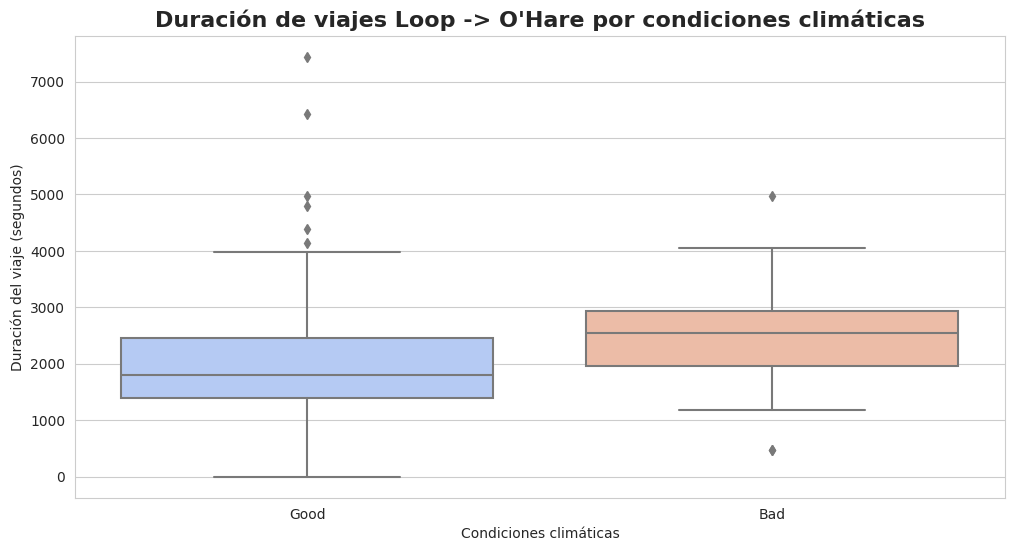

In [ ]:

# ------ Gráfico: Duración de viajes por condiciones climáticas ------

plt.figure(figsize=(12,6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=trips_loop_ohare, palette='coolwarm')
plt.title('Duración de viajes Loop -> O\'Hare por condiciones climáticas', fontsize=16, weight='bold')
plt.xlabel('Condiciones climáticas')
plt.ylabel('Duración del viaje (segundos)')
plt.show()


**Paso 5: Prueba de Hipótesis**

- Hipótesis planteadas:
  - H0: La duración promedio de los viajes desde Loop hasta O’Hare **no difiere** según las condiciones climáticas.
  - H1: La duración promedio de los viajes **difere** según las condiciones climáticas.
- Se aplicó la **prueba estadística Mann-Whitney U** porque los datos pueden no seguir una distribución normal.
- Resultado de la prueba:
  - Si p-value < 0.05 → **Rechazamos H0**: la duración promedio difiere significativamente según si es un sábado lluvioso o no.
  - Si p-value ≥ 0.05 → **No se rechaza H0**: no hay evidencia suficiente de diferencia.
- El gráfico de caja muestra la comparación de la duración de viajes entre condiciones **Good** y **Bad**, evidenciando visualmente la diferencia.

# Conclusión General del Proyecto 🚖
**Resumen General**
- La combinación de **análisis exploratorio** y **prueba de hipótesis** permitió identificar patrones clave en la operación de taxis en Chicago.
- Los datos revelan **empresas y barrios predominantes**, así como el **impacto potencial del clima** en la duración de los viajes.
- Este enfoque proporciona una base sólida para la **toma de decisiones estratégicas** y optimización de rutas en la empresa de viajes compartidos Zuber.